# Some Experiments

## Equal Hist and Undistort

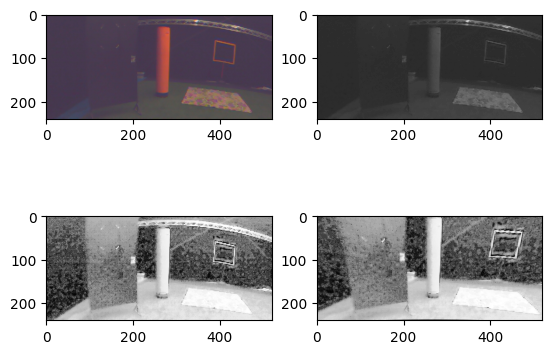

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('./mav_datasets/cyberzoo_poles_panels_mats/img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eqhist = cv2.equalizeHist(gray)


camera_matrix = np.array([
    [323.304409,     0.        , 264.18111025],
    [  0.      ,   323.7376457 , 213.45697442],
    [  0.      ,     0.        ,   1.        ]
])
distortion = np.array([-3.42172150e-01,  1.42619049e-01,  6.17693970e-05,  1.79552140e-04, -3.15633945e-02])


h, w = image.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, distortion, (w, h), 0, (w, h))
dst = cv2.undistort(eqhist, camera_matrix, distortion, None, newcameramtx)

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.subplot(2, 2, 2)
plt.imshow(gray, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(eqhist, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(dst, cmap='gray')


plt.show()

## Try Gray to Binary

2.1715481171548117
2.1666666666666665


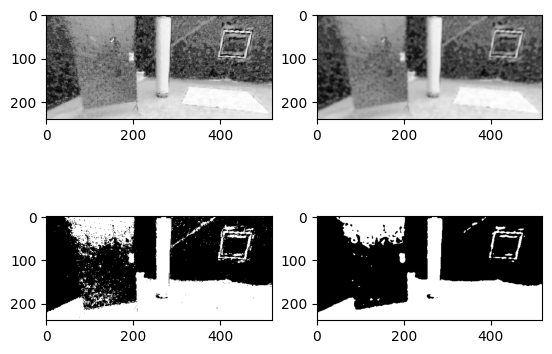

In [2]:
x, y, w_, h_ = roi
print(w_/h_)
print(w/h)
img_roi = dst[y:y+h_, x:x+w_]

img_roi_blur = cv2.GaussianBlur(img_roi, (7, 7), 0)

th, ret = cv2.threshold(img_roi,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th2, ret2 = cv2.threshold(img_roi_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


plt.subplot(2, 2, 1)
plt.imshow(img_roi, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(img_roi_blur, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(ret, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(ret2, cmap='gray')

plt.show()

## goodFeaturesToTrack

/tmp/ipykernel_38099/187469042.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


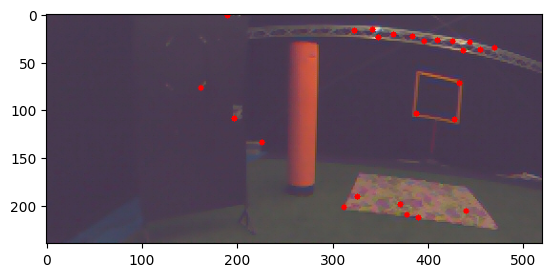

In [3]:
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(image,(x,y),3,255,-1)
plt.imshow(image)
plt.show()

## Edges

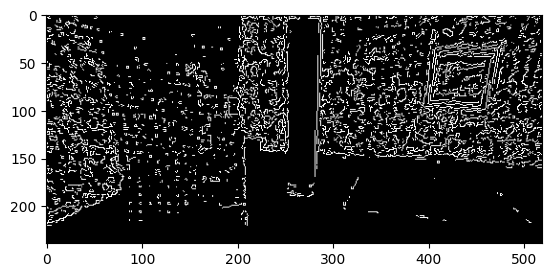

In [4]:
edges = cv2.Canny(img_roi,250,200)
plt.imshow(edges,cmap = 'gray')
plt.show()
# Canny

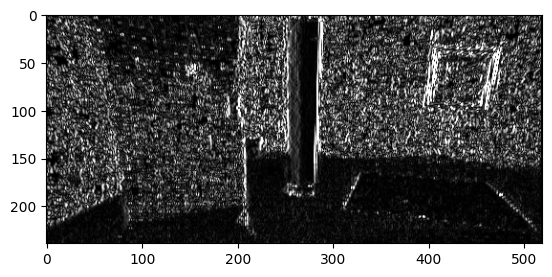

In [5]:
# sobel
ddepth = cv2.CV_16S
scale = 1
delta = 0
grad_x = cv2.Sobel(img_roi, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
plt.imshow(abs_grad_x, cmap = 'gray')
plt.show()

## Use imshow for debug

1. compile opencv with `-DWITH_GTK=ON` (`sw/ext/opencv_bebop/makefile`)
2. link required libraries in module conf (already added to my module xml):

    ```
    <flag name="LDFLAGS" value="lgobject-2.0"/>
    <flag name="LDFLAGS" value="lcairo"/>
    <flag name="LDFLAGS" value="lgdk_pixbuf-2.0"/>
    <flag name="LDFLAGS" value="lgtk-3"/>
    <flag name="LDFLAGS" value="lgdk-3"/>
    ```
## Use Opencv on apple silicon

* The opencv cmakelist seems to detect apple processors as nvidia tegra devices and compiles carotene and makes linking opencv-world incorrect
    * The solution is to build with `-DWITH_CAROTENE=OFF`
     (in the root makefile `sw/ext/opencv_bebop/makefile`)
* Also remember to change every instance of `x86_64` to `aarch64` in `conf/modules/cv_maze_runner.xml`
